# 활성화 함수 구현하기

In [ ]:
def step(x):
  if x > 0.000001:  
    return 1
  else:	   	  
    return 0


In [ ]:
def step(x):
	result = x > 0.000001
	return result.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


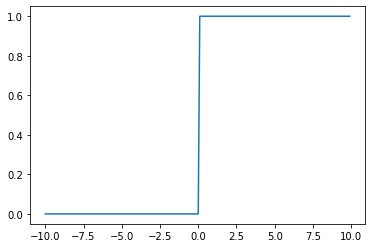

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10.0, 10.0, 0.1)
y = step(x)
plt.plot(x, y)
plt.show()

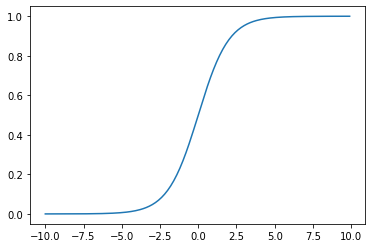

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
	return 1.0 / (1.0 + np.exp(-x)) 

x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()


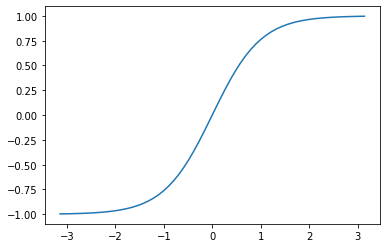

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
x = np.linspace(-np.pi, np.pi, 60) 
y = np.tanh(x) 
plt.plot(x, y) 
plt.show() 


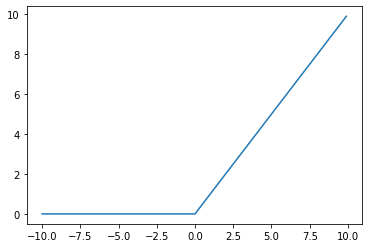

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def relu(x):
	return np.maximum(x, 0)
  
x = np.arange(-10.0, 10.0, 0.1)
y = relu(x)
plt.plot(x, y) 
plt.show() 


# MLP 순방향

In [ ]:
import numpy as np

def actf(x):
	return 1/(1+np.exp(-x))


def actf_deriv(x):
	    return x*(1-x)

inputs, hiddens, outputs = 2, 2, 1
learning_rate=0.2

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

In [ ]:
W1 = np.array([[0.10, 0.20],
                 [0.30, 0.40]])
W2 = np.array([[0.50], [0.60]])
B1 = np.array([0.1, 0.2])
B2 = np.array([0.3])   

# 순방향 전파 계산
def predict(x):
        layer0 = x
        Z1 = np.dot(layer0, W1)+B1
        layer1 = actf(Z1)
        Z2 = np.dot(layer1, W2)+B2
        layer2 = actf(Z2)
        return layer0, layer1, layer2


In [ ]:
def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)
test() 


[[0 0]] [0] [[0.70938314]]
[[0 1]] [1] [[0.72844306]]
[[1 0]] [1] [[0.71791234]]
[[1 1]] [0] [[0.73598705]]


# MSE

In [ ]:
y = np.array([ 0.0, 0.0, 0.8, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0 ])
target = np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])

def MSE(target, y):
  return 0.5 * np.sum((y-target)**2)

MSE(target, y)

0.029999999999999992

In [ ]:
y =        np.array([ 0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ] )
target = np.array([ 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])

def MSE(target, y):
	return 0.5 * np.sum((y-target)**2)
MSE(target, y)

0.81

# 경사하강법 실습

In [ ]:
x = 10  
learning_rate = 0.2  
precision = 0.00001  
max_iterations = 100

loss_func = lambda x: (x-3)**2 + 10

gradient = lambda x: 2*x-6

for i in range(max_iterations):
    x = x - learning_rate * gradient(x)
    print("손실함수값(", x, ")=", loss_func(x))

print("최소값 = ", x)

손실함수값( 7.199999999999999 )= 27.639999999999993
손실함수값( 5.52 )= 16.350399999999997
손실함수값( 4.512 )= 12.286143999999998
손실함수값( 3.9071999999999996 )= 10.82301184
손실함수값( 3.54432 )= 10.2962842624
손실함수값( 3.3265919999999998 )= 10.106662334464
손실함수값( 3.1959551999999998 )= 10.03839844040704
손실함수값( 3.11757312 )= 10.013823438546535
손실함수값( 3.070543872 )= 10.004976437876753
손실함수값( 3.0423263232 )= 10.001791517635631
손실함수값( 3.02539579392 )= 10.000644946348826
손실함수값( 3.015237476352 )= 10.000232180685577
손실함수값( 3.0091424858112 )= 10.000083585046807
손실함수값( 3.00548549148672 )= 10.000030090616852
손실함수값( 3.003291294892032 )= 10.000010832622067
손실함수값( 3.0019747769352194 )= 10.000003899743945
손실함수값( 3.0011848661611316 )= 10.00000140390782
손실함수값( 3.000710919696679 )= 10.000000505406815
손실함수값( 3.0004265518180073 )= 10.000000181946453
손실함수값( 3.0002559310908046 )= 10.000000065500723
손실함수값( 3.0001535586544827 )= 10.00000002358026
손실함수값( 3.0000921351926895 )= 10.000000008488893
손실함수값( 3.0000552811156136 )= 10.000000

# 2차원 그래디언트 시각화

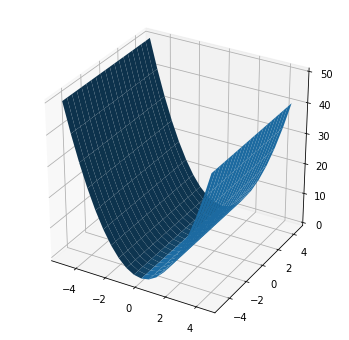

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)

X,Y = np.meshgrid(x,y)
Z = X**2 + y**2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Z)
plt.show()

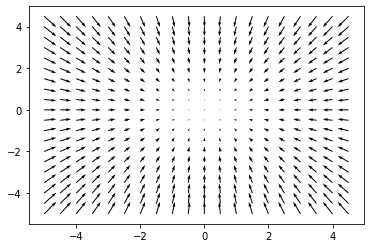

In [ ]:
U = -2*X
V = -2*Y

plt.figure()
Q = plt.quiver(X,Y,U,V, units = 'width')
plt.show()

# 넘파이를 이용한 MLP 구현

In [32]:
import numpy as np

def actf(x):
	return 1/(1+np.exp(-x))

def actf_deriv(x):
	return x*(1-x)

inputs, hiddens, outputs = 2, 2, 1
learning_rate=0.2

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

In [33]:
W1 = np.array([[0.10,0.20], [0.30,0.40]])
W2 = np.array([[0.50],[0.60]])
B1 = np.array([0.1, 0.2])
B2 = np.array([0.3])   

# 순방향 전파 구현

In [34]:
# 순방향 전파 계산
def predict(x):
        layer0 = x	
        Z1 = np.dot(layer0, W1)+B1	
        layer1 = actf(Z1) 
        Z2 = np.dot(layer1, W2)+B2	
        layer2 = actf(Z2)	
        return layer0, layer1, layer2


# 오차 역전파 구현

In [35]:
# 역방향 전파 계산
def fit():
  global W1, W2, B1, B2		
  for i in range(90000):		
    for x, y in zip(X, T):
      x = np.reshape(x, (1, -1))
      y = np.reshape(y, (1, -1))

# y%9000 
      layer0, layer1, layer2 = predict(x)			
      layer2_error = layer2-y	
      layer2_delta = layer2_error*actf_deriv(layer2)	
      layer1_error = np.dot(layer2_delta, W2.T)	
      layer1_delta = layer1_error*actf_deriv(layer1)	

      W2 += -learning_rate*np.dot(layer1.T, layer2_delta)	
      W1 += -learning_rate*np.dot(layer0.T, layer1_delta)	
      B2 += -learning_rate*np.sum(layer2_delta, axis=0)	
      B1 += -learning_rate*np.sum(layer1_delta, axis=0)	


In [36]:
def test():
  for x,y in zip(X,T):
    # x = np.reshape(x(1,-1))
    layer0, layer1, layer2 = predict(x)
    print(x, y, layer2)

In [37]:
fit()
test()

[0 0] [0] [0.00814407]
[0 1] [1] [0.99154105]
[1 0] [1] [0.99152258]
[1 1] [0] [0.01038517]


In [ ]:
test()

In [ ]:
# 역방향 전파 계산
def fit():
  global W1, W2, B1, B2		
  for i in range(90000):		
    for x, y in zip(X, T):
      x = np.reshape(x, (1, -1))
      y = np.reshape(y, (1, -1))

      layer0, layer1, layer2 = predict(x)			
      layer2_error = layer2-y	
      layer2_delta = layer2_error*actf_deriv(layer2)	
      layer1_error = np.dot(layer2_delta, W2.T)	
      layer1_delta = layer1_error*actf_deriv(layer1)	
            
      W2 += -learning_rate*np.dot(layer1.T, layer2_delta)	
      W1 += -learning_rate*np.dot(layer0.T, layer1_delta)	
      B2 += -learning_rate*np.sum(layer2_delta, axis=0)	
      B1 += -learning_rate*np.sum(layer1_delta, axis=0)	